In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
load_dotenv()

PERPLEXITY_API_KEY = os.getenv("PERPLEXITY_API_KEY")

model = ChatOpenAI(
    model="sonar",                     # base Sonar model
    base_url="https://api.perplexity.ai",
    api_key=PERPLEXITY_API_KEY,
    temperature=0.7
)

In [3]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str
    

In [4]:
def generate_joke(state: JokeState):
    prompt = f"generate a joke on the given topic {state['topic']}"
    response = model.invoke(prompt).content
    return {"joke": response}

def generate_explanation(state: JokeState):
    prompt = f"generate explanation of given joke {state['joke']}"
    response = model.invoke(prompt).content
    return {"explanation": response}

In [5]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

checkPointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkPointer)

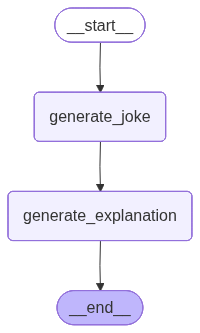

In [6]:
workflow

In [7]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'IT JOBS'}, config=config1)

{'topic': 'IT JOBS',
 'joke': 'Here\'s a joke on the topic of IT jobs:\n\n**Why do software developers never get locked out of their houses?**  \nBecause they always have the *keys* to the code!  \n\nThis plays on the programming concept of "keys" (like in databases or encryption) and the idea of having keys to a house, blending an IT job term with everyday life humor[1][2].',
 'explanation': 'Here’s an explanation of the joke:\n\n**Why do software developers never get locked out of their houses?**  \n**Because they always have the *keys* to the code!**\n\n## Double Meaning of "Keys"\n\n- **Literal Meaning:** In everyday life, a "key" is what you use to unlock your house.\n- **Technical Meaning:** In programming, a "key" often refers to a unique identifier in databases or a piece of information used in encryption and authentication systems.\n\n## Humor Mechanics\n\nThe joke works by blending these two meanings. Software developers are humorously portrayed as never getting locked out—no